In [2]:
from data_datasets import higgs,susy,cod_rna
N = 5000
data = "susy"
# data = "higgs"
# data = "cod_rna"
####################

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: susy
--------
Shape train data: (5000, 18)
Shape test data: (5000, 18)


Training is done in 9 iteration with CG-method. Precondition: rpc
Training is done in 41 iteration with CG-method. Precondition: rff
Training is done in 9 iteration with CG-method. Precondition: greedy
Training is done in 8 iteration with CG-method. Precondition: nystrom
Training is done in 9 iteration with CG-method. Precondition: without precondition


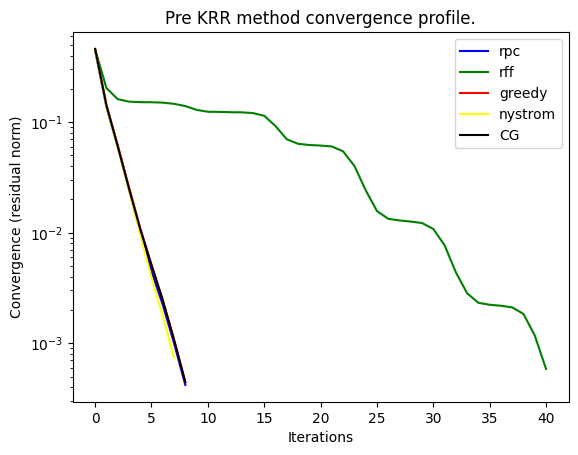

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pkrr import PKRR


# Create a figure and a set of subplots
fig, ax = plt.subplots()
# Set the labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('Convergence (residual norm)')
ax.set_title('Pre KRR method convergence profile.')


methods = ["rpc", "rff", "greedy", "nystrom", None]
models_residuals = []
colors = ['b', 'g', 'r', 'yellow', "black"]

for i, method in enumerate(methods):
    if method is None:
        prec = method
    model = PKRR(mu=.5, rank=20, prec=method, sigma=1., gamma=1.)
    model.fit(X_train=X_train, y_train=y_train, max_iter=100)
    # Plot the first function
    m_res = model.residuals
    label = "CG" if method == None else method
    ax.semilogy(range(len(m_res)), m_res, colors[i], label=label)
    print(model.report)

# Add a legend
ax.legend()

# Display the plot
plt.show()